### Import modules

In [1]:
# Get zoom-able notebook; must be called before importing the module
%matplotlib notebook 
# IPython extension to autoreload modules
#%load_ext autoreload 
# 2 = reload all modules every time before executing the Python code typed
#%autoreload 2 

import seapy
import scipy
import numpy as np
# Note that splitting up matplotlib importation between cells can cause plots to not appear!
import matplotlib as mpl
import matplotlib.dates as dates
from matplotlib.dates import num2date, date2num, datetime
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.path import Path
from mpl_toolkits.basemap import Basemap

## Plotting protocol: example (don't edit)

<IPython.core.display.Javascript object>


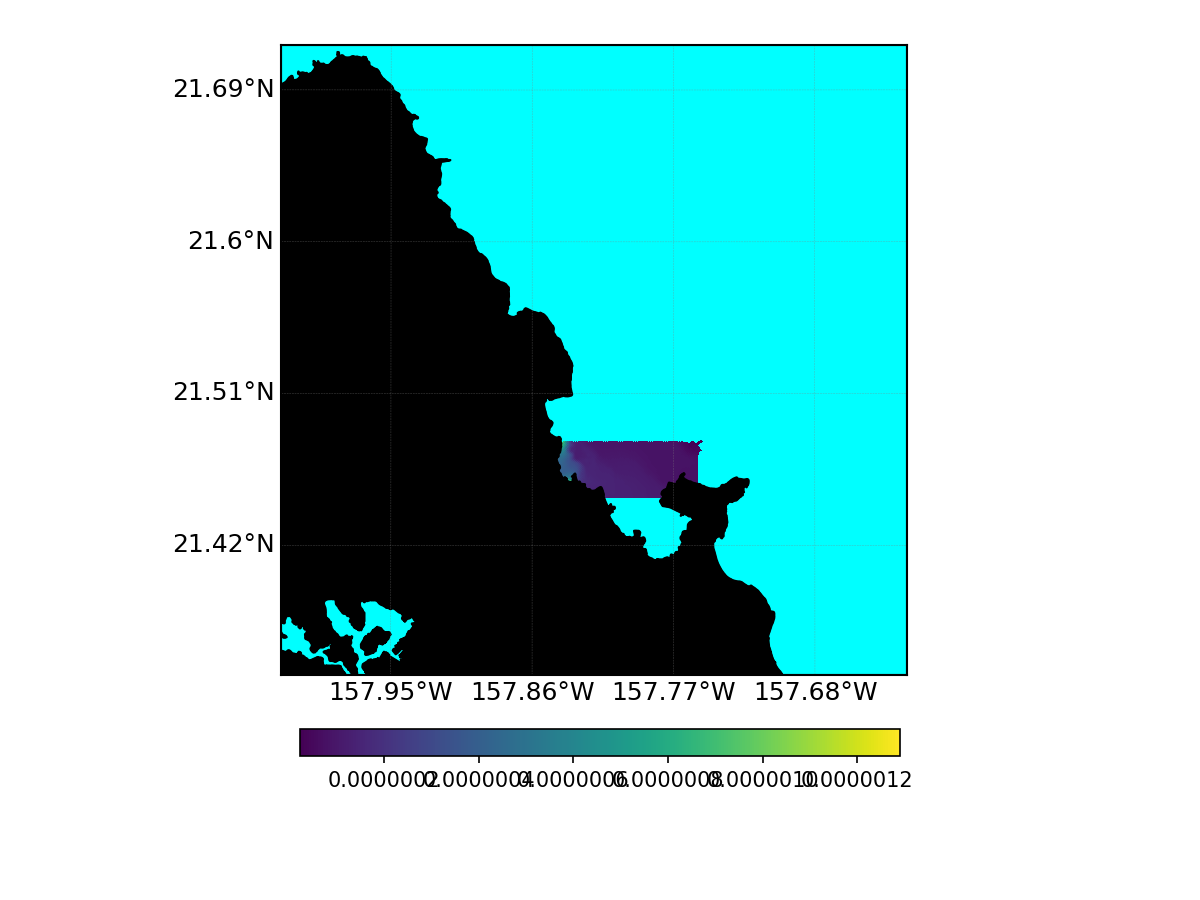

In [27]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-2013-seasonal-netcdf/CB_all_var.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-2013-seasonal-netcdf/CB_all_var.nc')
t = nc.variables['nsmz'][20,5,:,:] # dims: ocean_time = 61, s_rho = 20, y = 90, x = 190
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t)
mb.land()
mb.colorbar()
plt.show()

## Validation plots

Before proceeding, I transfered all files on my local to the server. I may use these, or not- but I am running out of space on my local machine, as these netCDFs are so hefty: 
```sh
scp -r hioekg-2013 lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/Manuscript
# Not using for this but still storing here...
scp -r hioekg-2014 lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/Manuscript
# Later, for inter-annual plots:
scp -r hioekg-compare-years lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/Manuscript

```

##### Wet season: October - April

In terminal:

```sh
cd '/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/'

ncra hioekg_monthly_mean_04750.nc hioekg_monthly_mean_04780.nc hioekg_monthly_mean_04810.nc hioekg_monthly_mean_04840.nc hioekg_monthly_mean_05020.nc hioekg_monthly_mean_05050.nc hioekg_monthly_mean_05080.nc hioekg_wet_season_mean_2013.nc
```

##### Dry season: May - September

```sh
cd '/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/'

ncra hioekg_monthly_mean_04870.nc hioekg_monthly_mean_04900.nc hioekg_monthly_mean_04930.nc hioekg_monthly_mean_04960.nc hioekg_monthly_mean_04990.nc hioekg_dry_season_mean_2013.nc
```

*Note:* I decided against displaying a proportional "wet vs. dry" figure, and instead opted for a combined figure showing wet *and* dry concentrations side-by-side. I had some issues with the execution of the ncbo command on the full grid- i.e., a floating point error- and I considered that the average reader would be capable of discerning visual differences from side-by-side images. And this way, they won't hav to dig through the text to find the concentrations for the presented variable. 

### nbact: wet vs. dry (2013) (for nbact_seasonal figure)

For this plot, and the following, I am adapting the simple seapy plotting protocol in the example above.

<IPython.core.display.Javascript object>


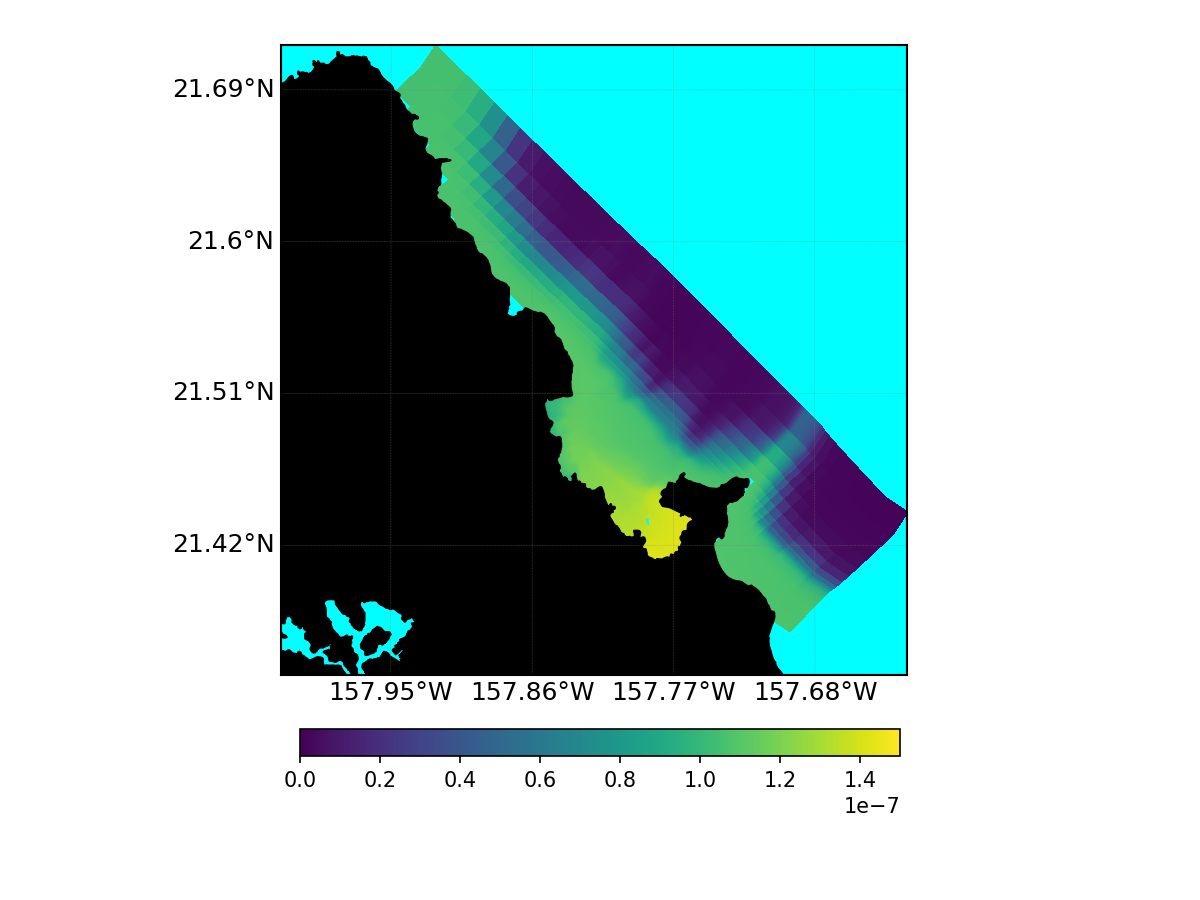

In [40]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['nbact'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000015)
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


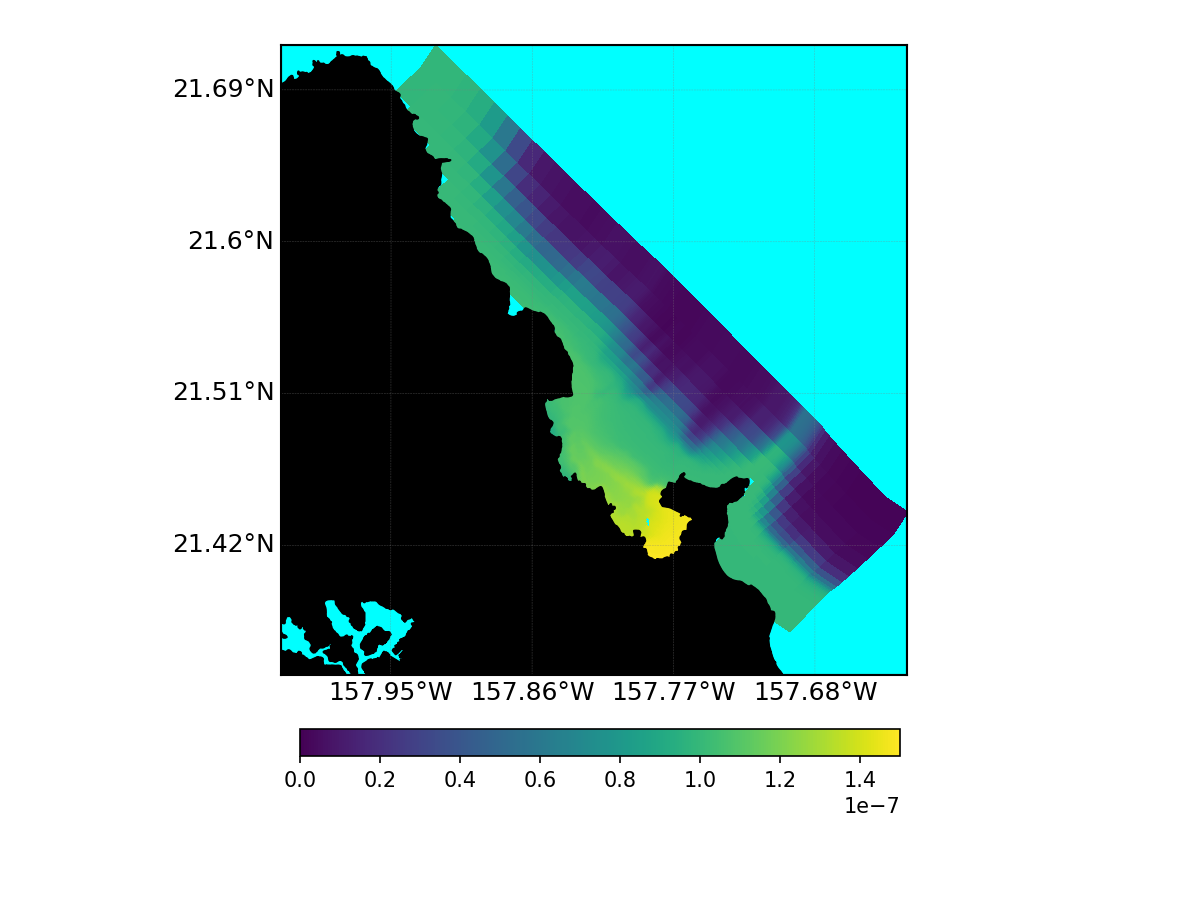

In [39]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['nbact'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000015)
mb.land()
mb.colorbar()
plt.show()

### nsm: wet vs. dry (2013) (for nsm_seasonal figure)

<IPython.core.display.Javascript object>


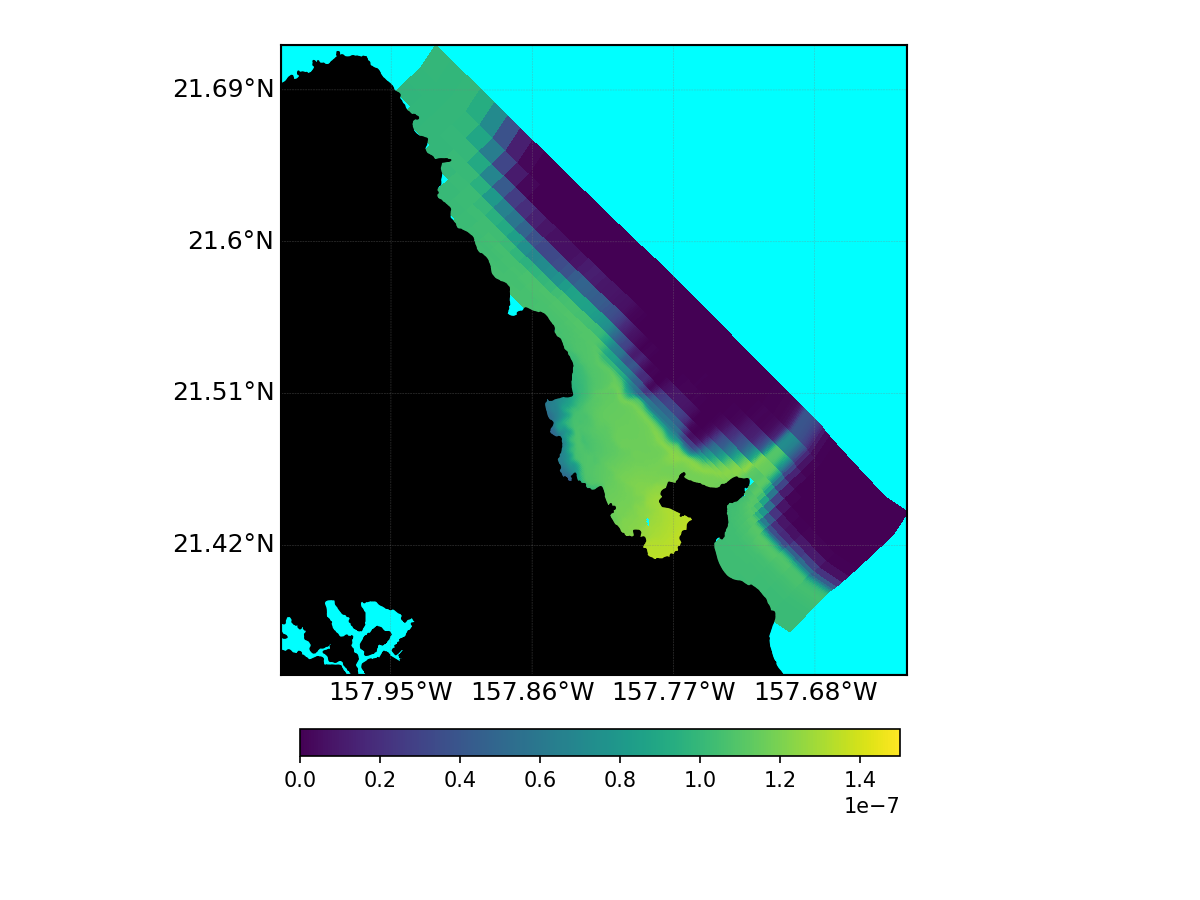

In [38]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['nsm'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000015)
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


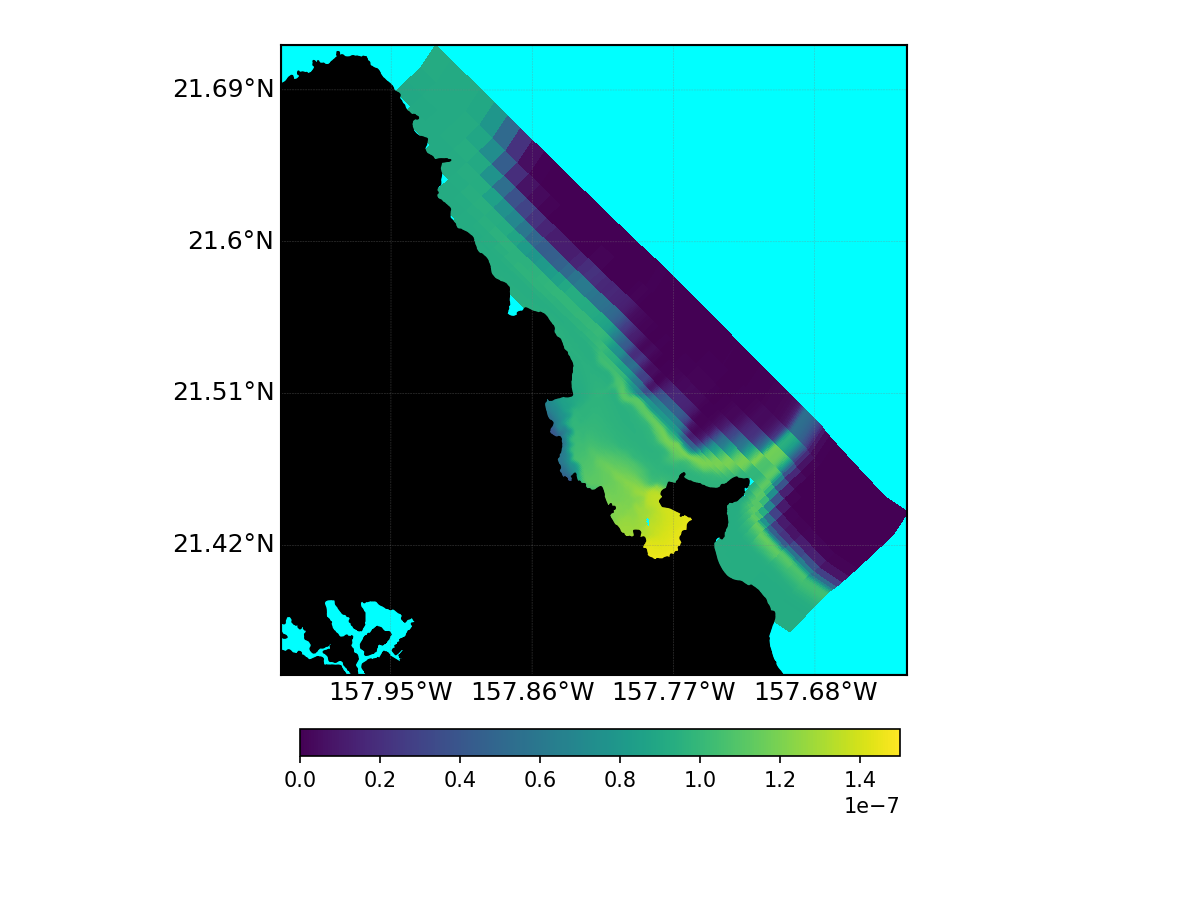

In [37]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['nsm'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000015)
mb.land()
mb.colorbar()
plt.show()

### nh4: wet vs. dry (2013 for nutrient_seasonal figure, inset A)

<IPython.core.display.Javascript object>


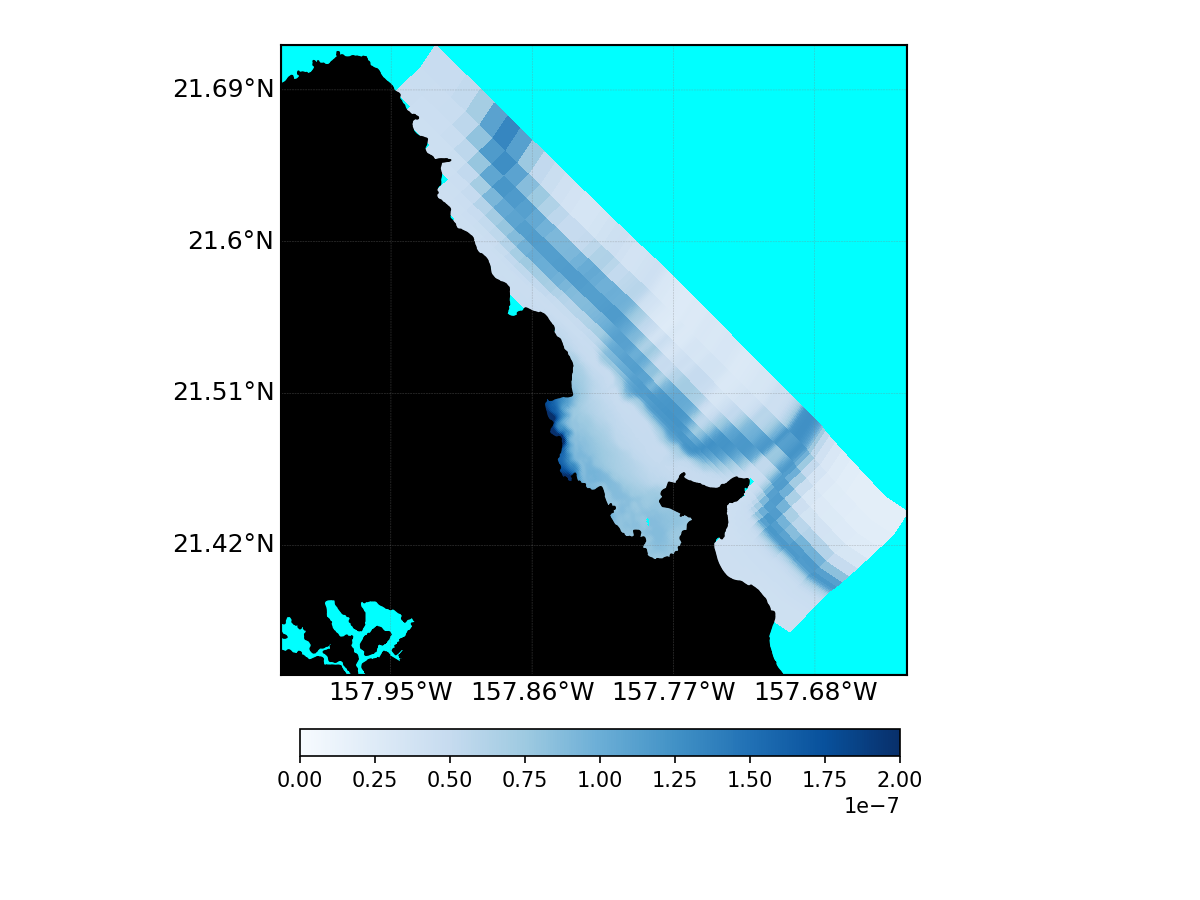

In [27]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['nh4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.0000002, cmap = 'Blues')
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


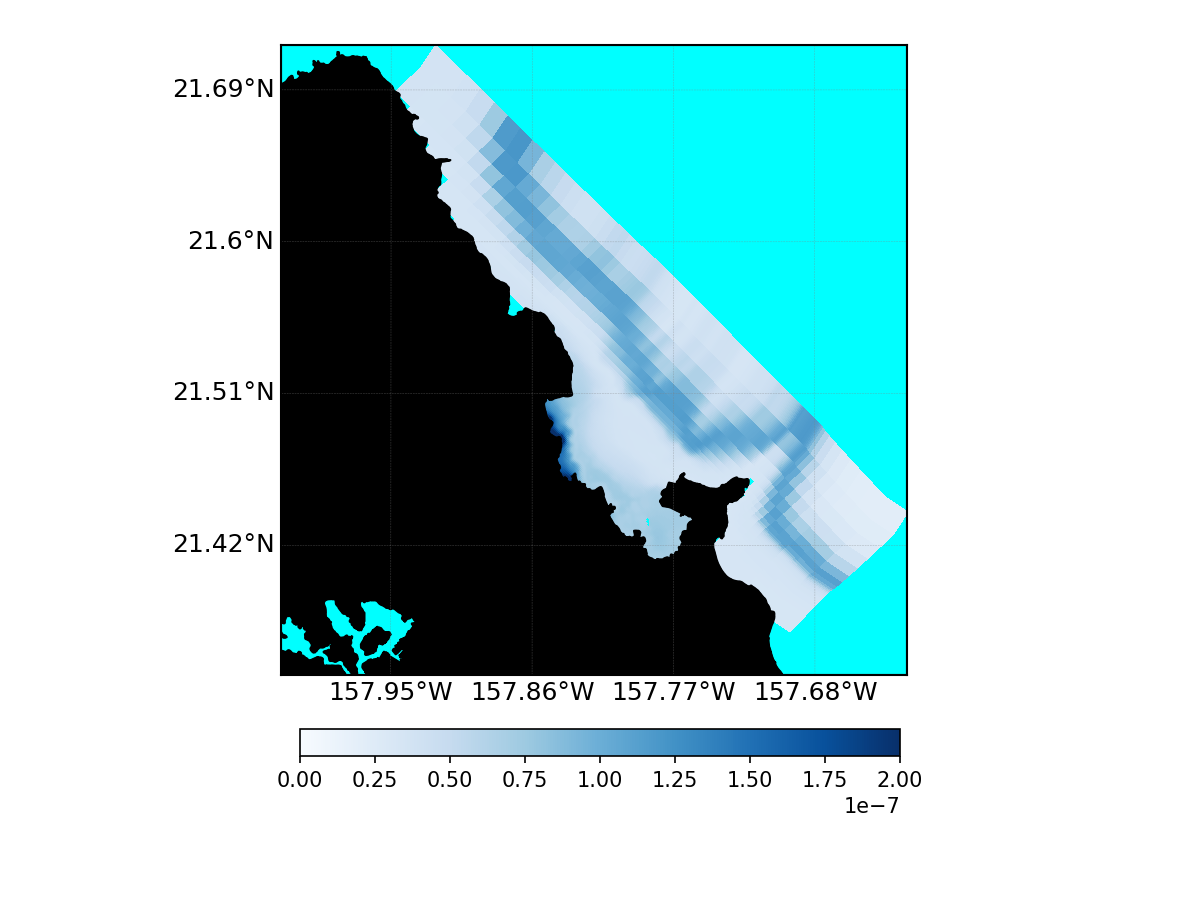

In [28]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['nh4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.0000002, cmap = 'Blues')
mb.land()
mb.colorbar()
plt.show()

### no3: wet vs. dry (2013 for nutrient_seasonal figure, inset B)

<IPython.core.display.Javascript object>


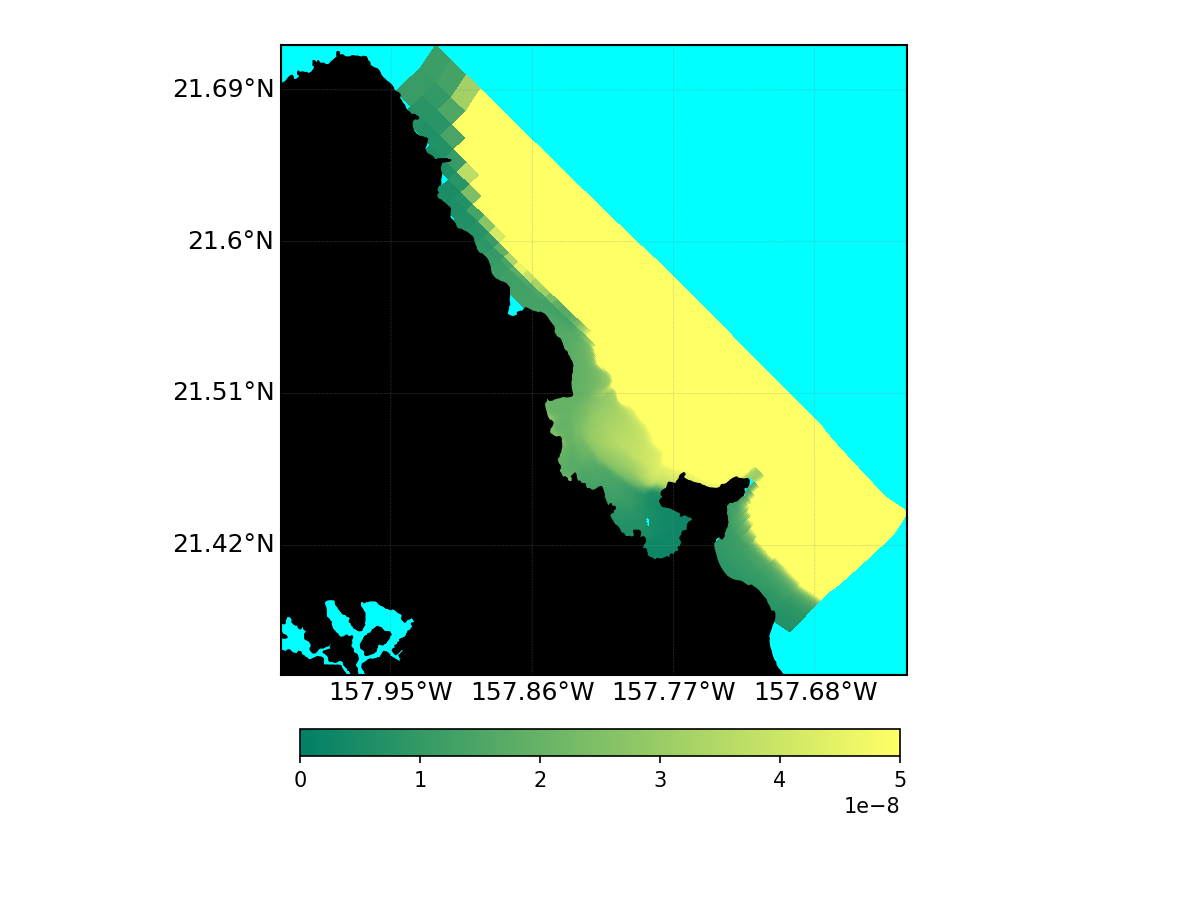

In [52]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_wet_season_mean_2013.nc')
t = nc.variables['no3'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000005, cmap = 'summer')
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


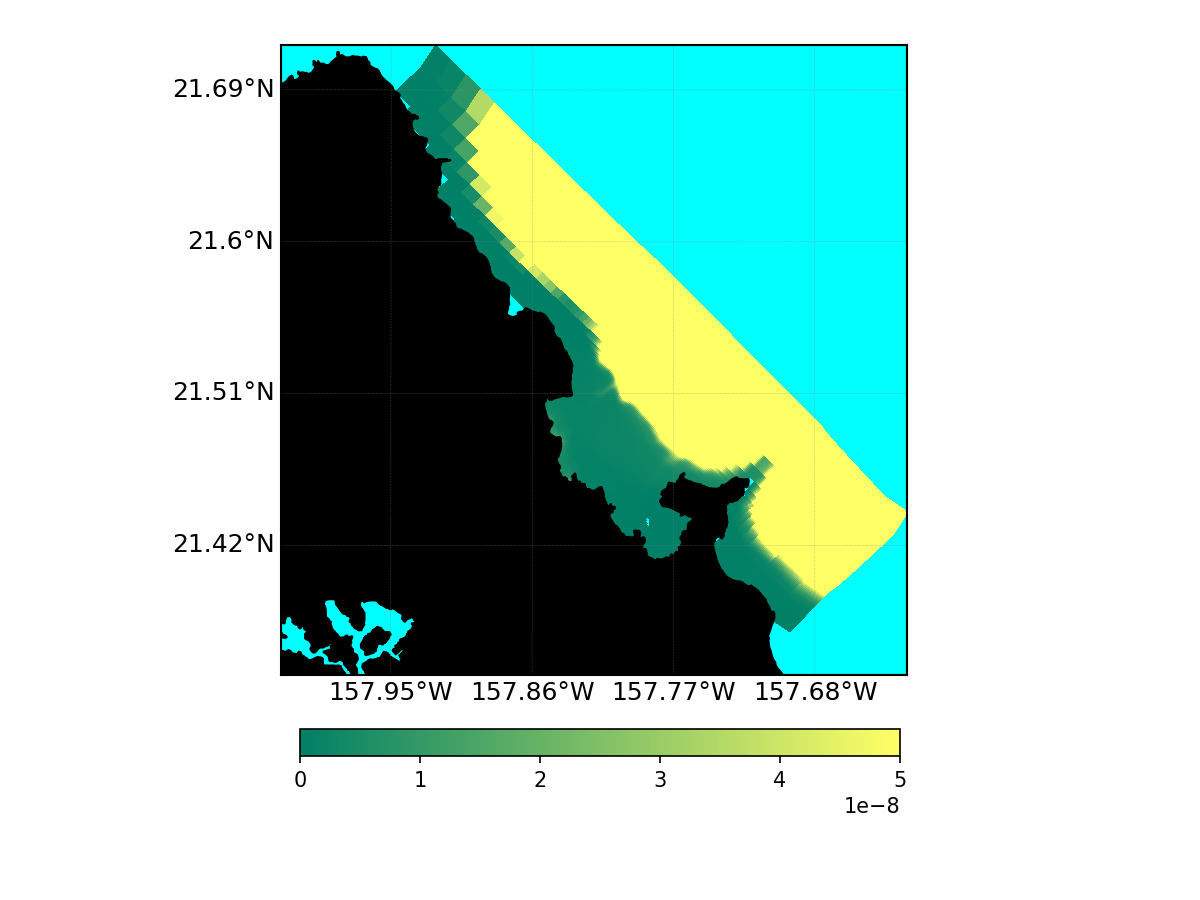

In [53]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dry_season_mean_2013.nc')
t = nc.variables['no3'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0, vmax = 0.00000005, cmap = 'summer')
mb.land()
mb.colorbar()
plt.show()

## Inter-annual key nutrients: early spring (Feb, Mar, Apr)

In terminal:

```
# Early spring 2013

cd hioekg-2013

ncra February_4780/hioekg_monthly_mean_04780.nc March_4810/hioekg_monthly_mean_04810.nc April_4840/hioekg_monthly_mean_04840.nc hioekg_early_spring_2013.nc

mv hioekg_early_spring_2013.nc ../hioekg-compare-years

# Early spring 2014

cd ../hioekg-2014

ncra February_5145/hioekg_monthly_mean_05145.nc March_5175/hioekg_monthly_mean_05175.nc April_5205/hioekg_monthly_mean_05205.nc hioekg_early_spring_2014.nc

mv hioekg_early_spring_2014.nc ../hioekg-compare-years
```

#### nh4: 2013 vs. 2014

<IPython.core.display.Javascript object>


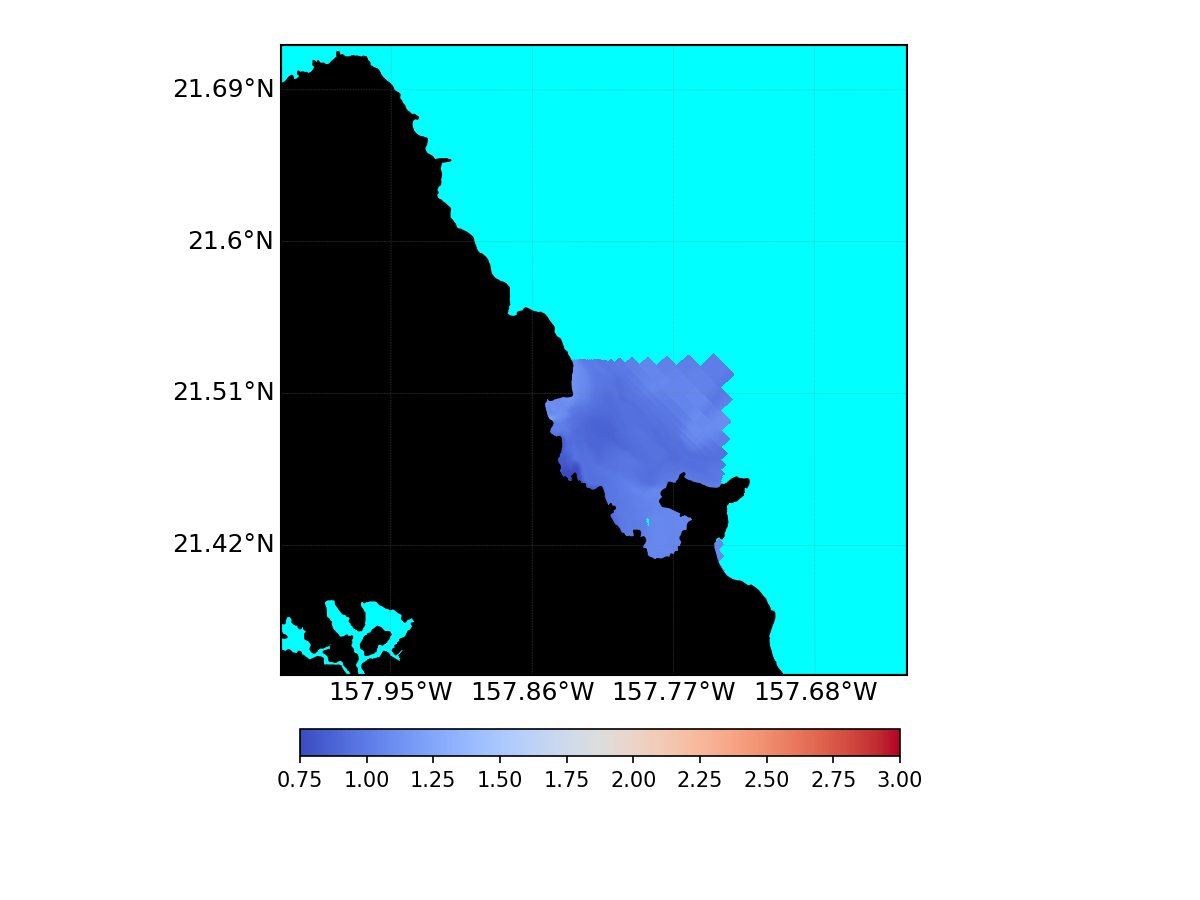

In [61]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
t = nc.variables['nh4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.75, vmax = 3, cmap = 'coolwarm')
mb.land()
mb.colorbar()
plt.show()

#### no3: 2013 vs. 2014

<IPython.core.display.Javascript object>


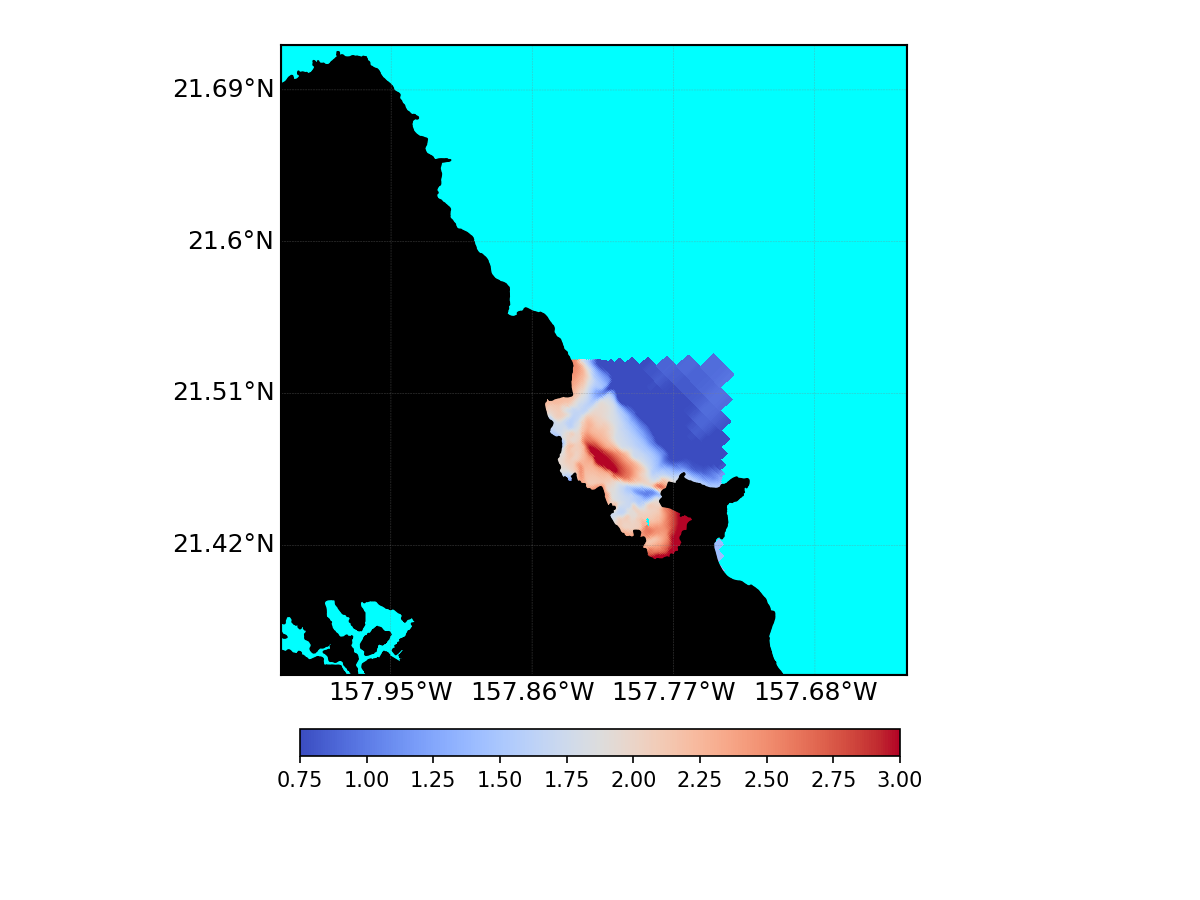

In [62]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
t = nc.variables['no3'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.75, vmax = 3, cmap = 'coolwarm')
mb.land()
mb.colorbar()
plt.show()

#### po4: 2013 vs. 2014

<IPython.core.display.Javascript object>


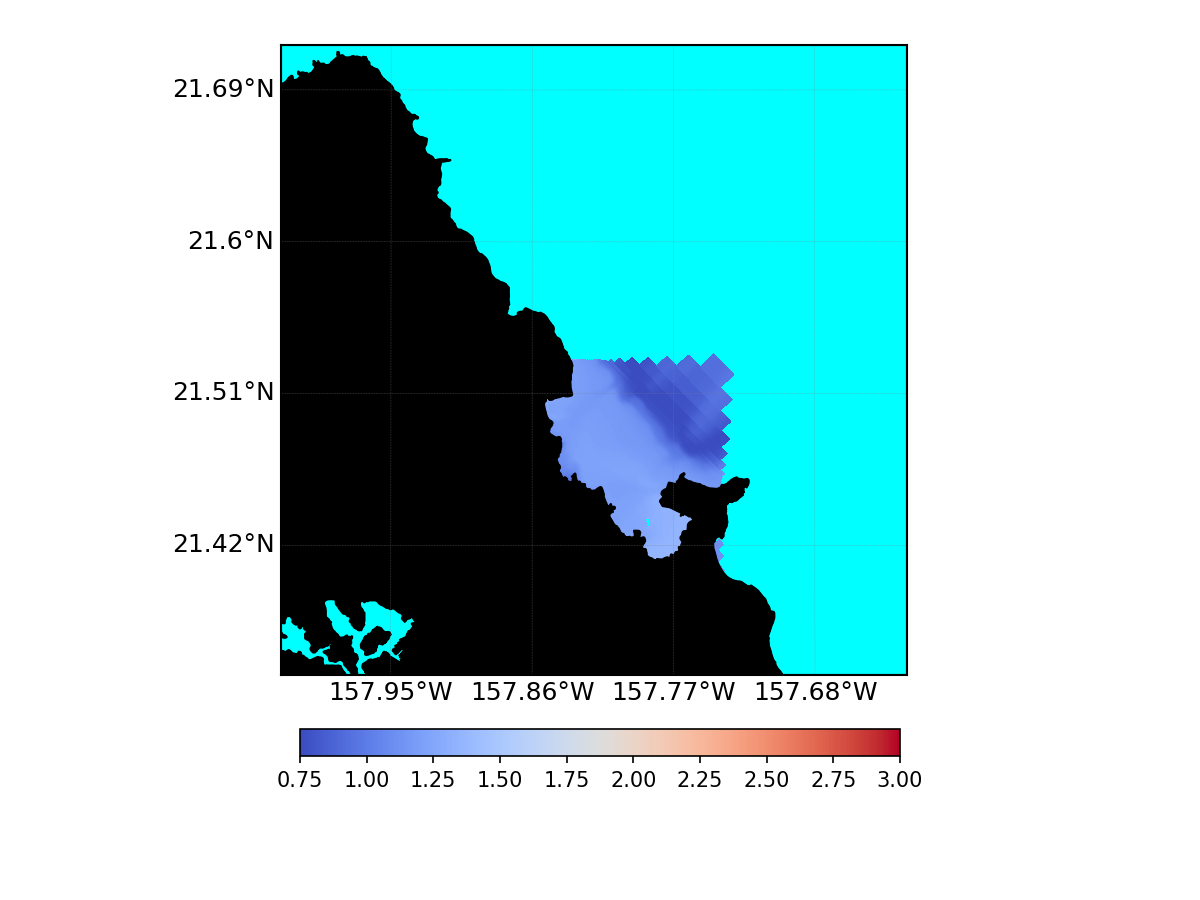

In [63]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
t = nc.variables['po4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.75, vmax = 3, cmap = 'coolwarm')
mb.land()
mb.colorbar()
plt.show()

#### sio4: 2013 vs. 2014

/share/apps/miniconda3/envs/frinkiac/lib/python3.7/site-packages/seapy-0.4.2-py3.7-linux-x86_64.egg/seapy/model/grid.py:456: UserWarning: could not compute grid depths.
  warn("could not compute grid depths.")
/share/apps/miniconda3/envs/frinkiac/lib/python3.7/site-packages/seapy-0.4.2-py3.7-linux-x86_64.egg/seapy/model/grid.py:507: UserWarning: could not compute grid thicknesses.
  warn("could not compute grid thicknesses.")


<IPython.core.display.Javascript object>


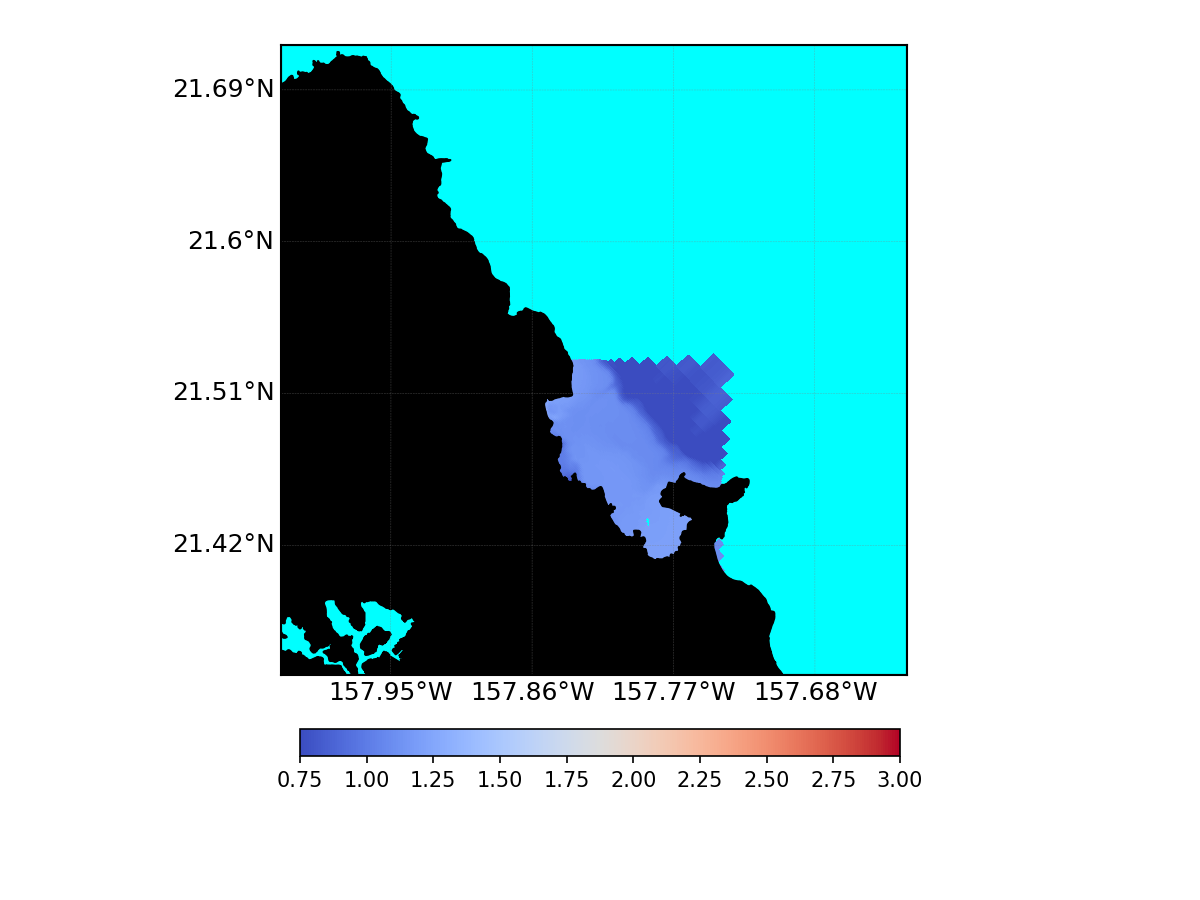

In [9]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_div.nc')
t = nc.variables['sio4'][0,0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.75, vmax = 3, cmap = 'coolwarm')
mb.land()
mb.colorbar()
plt.show()

## Diagnostic figures

**String of parameters**:
prod_n_100_lg,zloss_n_100_lg,hploss_n_100_lgz

prod_n_100_lg:long_name = "averaged nitrogen production for large phyto upper 100m" 

zloss_n_100_lg:long_name = "averaged loss to zooplankton for large phyto upper 100m"

"Large phytoplankton produced 20 - 50% more nitrogen and were consumed by zooplankton at rates 30 - 70% higher (highest nearshore) across the bay during the 2014 versus 2013 dry season."



hploss_n_100_lgz:long_name = "averaged loss to higher predators for large zoo upper 100m" ;
"Our model diagnostics further support this theory and also show that in the 2013 dry season, large zooplankton were consumed by higher predators at a rate 30 - 40% higher than the same period in 2014." 

ingest_n_100_lgz:long_name = "averaged ingestion for large zoo upper 100m" ;
"Large zooplankton were 40 - 60% more productive (i.e., ingested more prey) in the upper 100 m of the water column during the 2014 versus 2013 dry season. When comparing these energy exchanges between years for the wet season, spatial differences beyond 15% were infrequent."

Dry season: May - September
```
cd '/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/'

ncra hioekg_dia_monthly_mean_04870.nc hioekg_dia_monthly_mean_04900.nc hioekg_dia_monthly_mean_04930.nc hioekg_dia_monthly_mean_04960.nc hioekg_dia_monthly_mean_04990.nc hioekg_dia_dry_season_mean_2013.nc

cd '/share/frinkraid3/lindsayv/hioekg-2014/output_semi_daily/' 

ncra hioekg_dia_monthly_mean_05235.nc hioekg_dia_monthly_mean_05265.nc hioekg_dia_monthly_mean_05295.nc hioekg_dia_monthly_mean_05325.nc hioekg_dia_monthly_mean_05355.nc hioekg_dia_dry_season_mean_2014.nc

```

- On local 
```
scp lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/hioekg-2013/output_semi_daily/hioekg_dia_dry_season_mean_2013.nc .
scp lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/hioekg-2014/output_semi_daily/hioekg_dia_dry_season_mean_2014.nc .
```
Note that CDO tools do not like to be executed in chunks OR when naming the file the same as what it is to start. Errors abound when you do that.

```
cdo masklonlatbox,-157.9,-157.74,21.4,21.53 -selname,prod_n_100_lg,zloss_n_100_lg,prod_n_100_smz,zloss_n_100_smz,hploss_n_100_smz,prod_n_100_mdz,zloss_n_100_mdz,hploss_n_100_mdz,prod_n_100_lgz,ingest_n_100_lgz,hploss_n_100_lgz hioekg_dia_dry_season_mean_2013.nc ahioekg_dia_dry_season_mean_2013.nc 
#
#
cdo masklonlatbox,-157.9,-157.74,21.4,21.53 -selname,prod_n_100_lg,zloss_n_100_lg,prod_n_100_smz,zloss_n_100_smz,hploss_n_100_smz,prod_n_100_mdz,zloss_n_100_mdz,hploss_n_100_mdz,prod_n_100_lgz,ingest_n_100_lgz,hploss_n_100_lgz hioekg_dia_dry_season_mean_2014.nc ahioekg_dia_dry_season_mean_2014.nc 

scp ahioekg* lindsayv@frinkiac.soest.hawaii.edu:/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/
```

#### On server

- Annual dry season percent difference


```
cd Manuscript/hioekg-compare-years

ncbo --op_typ='/' ahioekg_dia_dry_season_mean_2013.nc ahioekg_dia_dry_season_mean_2014.nc hioekg_dia_dry_season_div.nc

mv ahioekg_dia_dry_season_mean_2013.nc hioekg_dia_dry_season_mean_2013.nc
mv ahioekg_dia_dry_season_mean_2014.nc hioekg_dia_dry_season_mean_2014.nc
```

...etc. I renamed all "ahioekg*" files (removed the a- which was only there to appease the CDO tools bug)

In [20]:
%cd '/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/'

/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years


#### Dry seasont 2013 vs. 2014: prod_n_100_lg: "averaged nitrogen production for large phyto upper 100m" 

<IPython.core.display.Javascript object>


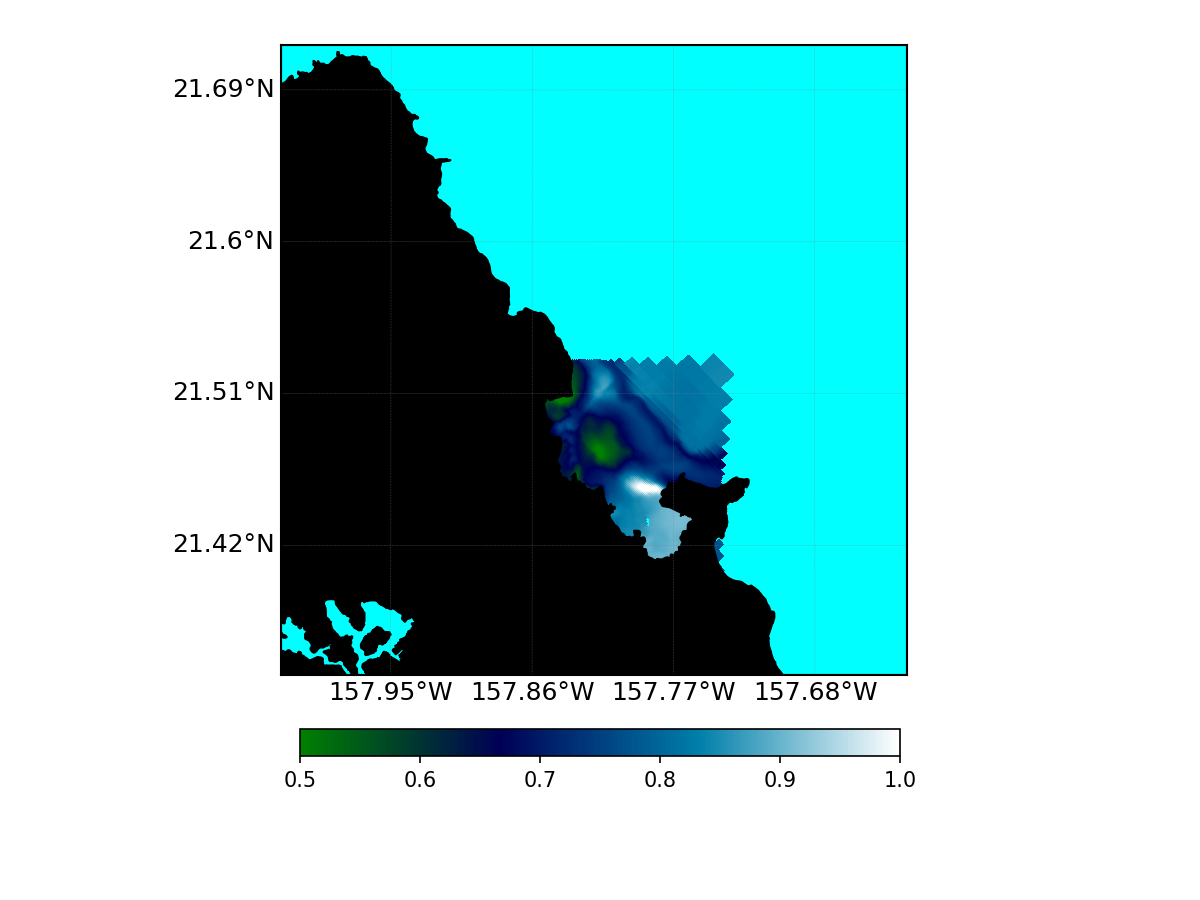

In [24]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/hioekg_dia_dry_season_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/hioekg_dia_dry_season_div.nc')
t = nc.variables['prod_n_100_lg'][0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.5, vmax = 1, cmap = 'ocean')
mb.land()
mb.colorbar()
plt.show()

#### Dry season 2013 vs. 2014: zloss_n_100_lg: "averaged loss to zooplankton for large phyto upper 100m"

<IPython.core.display.Javascript object>


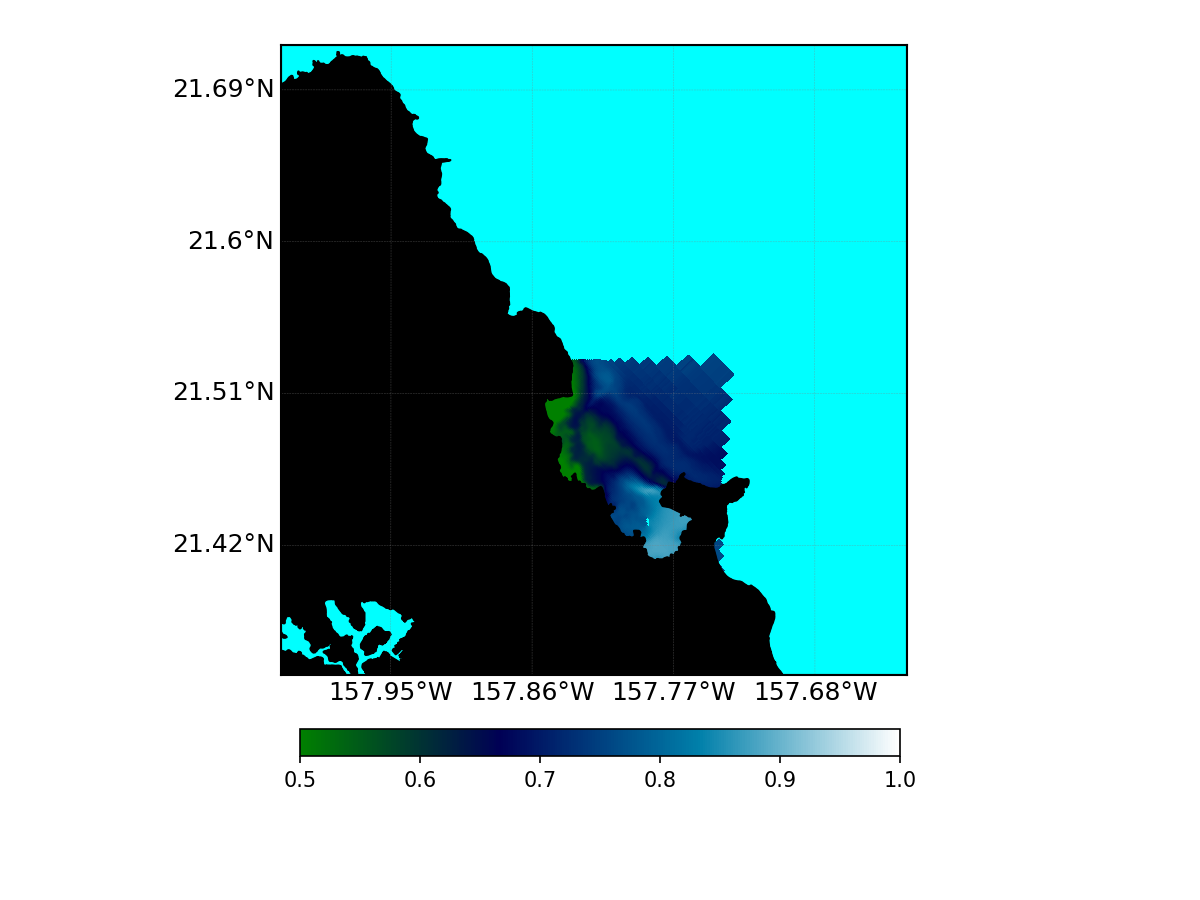

In [23]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/hioekg_dia_dry_season_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/hioekg_dia_dry_season_div.nc')
t = nc.variables['zloss_n_100_lg'][0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.5, vmax = 1, cmap = 'ocean')
mb.land()
mb.colorbar()
plt.show()

#### Dry season 2013 vs. 2014: hploss_n_100_lgz: "averaged loss to higher predators for large zoo upper 100m"

<IPython.core.display.Javascript object>


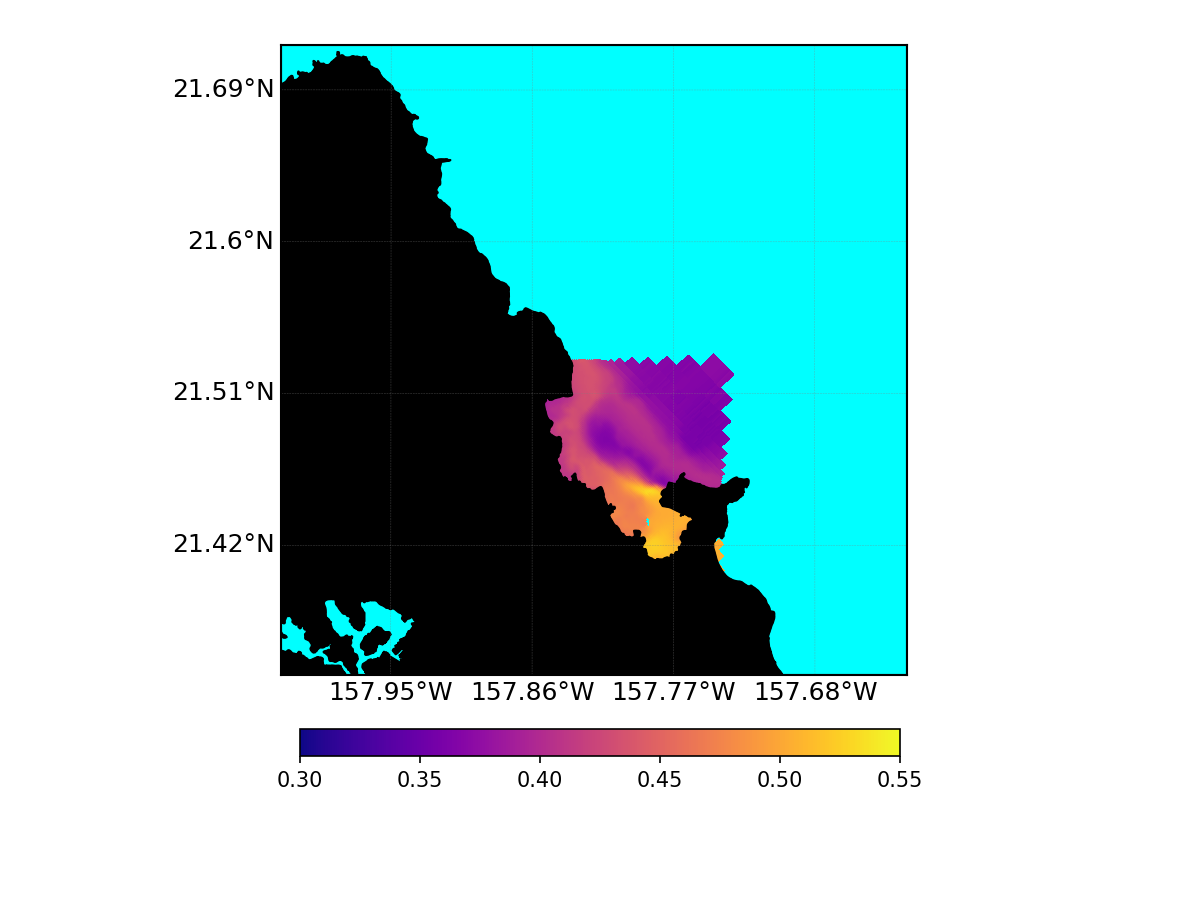

In [27]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/hioekg_dia_dry_season_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/hioekg_dia_dry_season_div.nc')
t = nc.variables['hploss_n_100_lgz'][0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, vmin = 0.3, vmax = 0.55, cmap = 'plasma')
mb.land()
mb.colorbar()
plt.show()

 #### Dry season 2013 vs. 2014: ingest_n_100_lgz: "averaged ingestion for large zoo upper 100m"

<IPython.core.display.Javascript object>


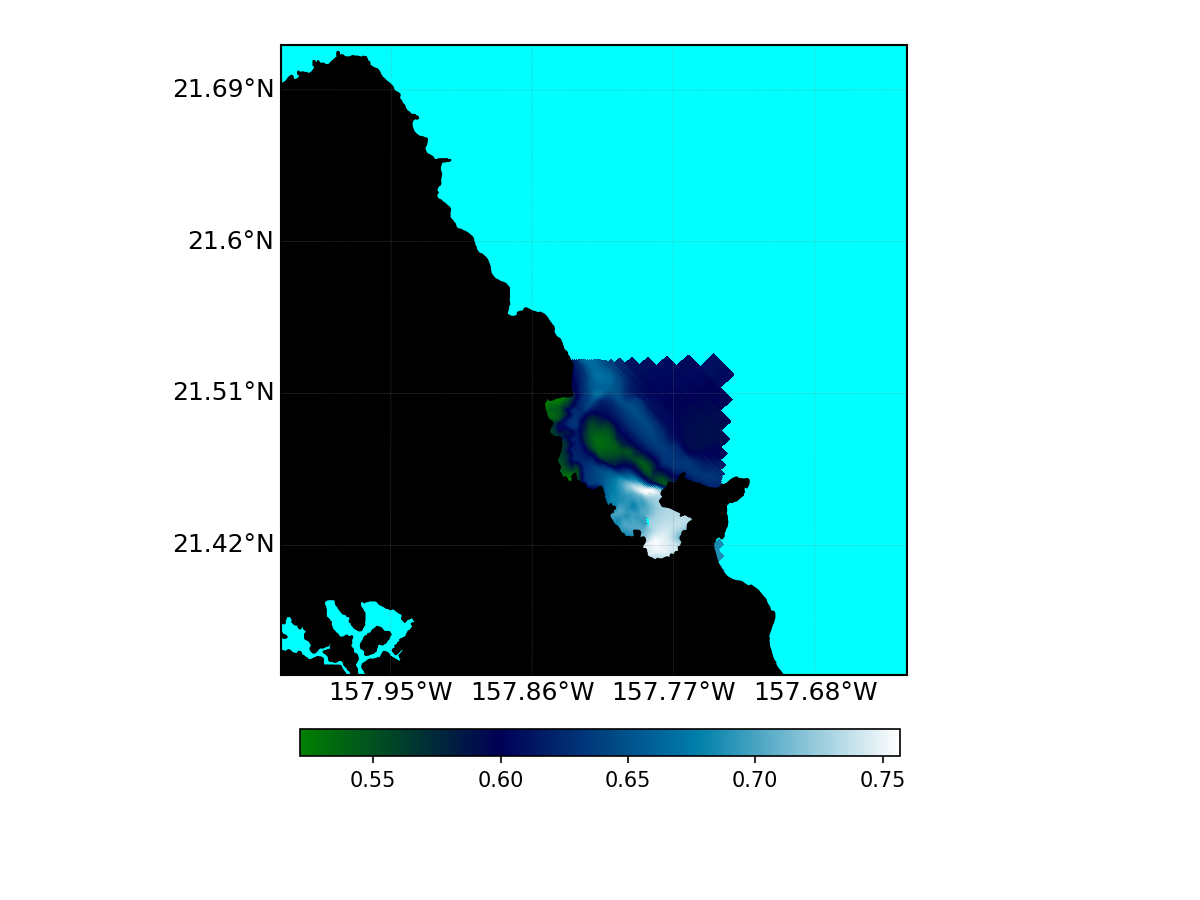

In [28]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/hioekg_dia_dry_season_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/hioekg_dia_dry_season_div.nc')
t = nc.variables['ingest_n_100_lgz'][0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, cmap = 'ocean')
mb.land()
mb.colorbar()
plt.show()

<IPython.core.display.Javascript object>


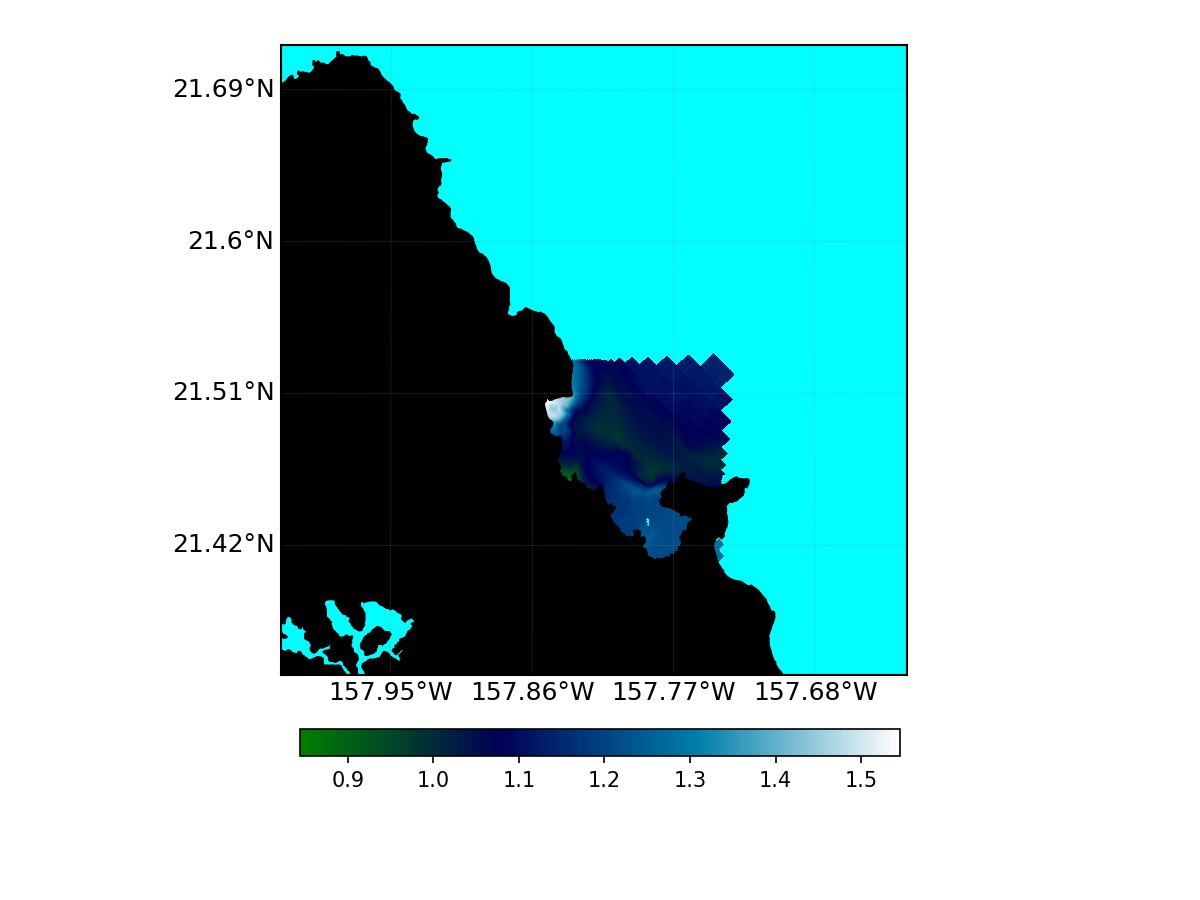

In [30]:
grid = seapy.model.asgrid('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_dia_div.nc')
nc = seapy.netcdf('/share/frinkraid3/lindsayv/Manuscript/hioekg-compare-years/early-spring/hioekg_early_spring_dia_div.nc')
t = nc.variables['ingest_n_100_lgz'][0,:,:] # time, depth, lon, lat
mb = seapy.hawaii(grid)
mb.pcolormesh(grid.lon_rho, grid.lat_rho, t, cmap = 'ocean')
mb.land()
mb.colorbar()
plt.show()